A notebook to plot drifter trajectories from UBC drifters in the Salish Sea

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import mpl_toolkits.basemap as basemap
import glob
import os
import netCDF4 as nc
import numpy as np

%matplotlib inline

# Plotting Map

In [2]:
def set_basemap(ax, xlim=[-127,-122],ylim=[48,51]):
    crnr = np.array([[xlim[0],ylim[0]],[xlim[1],ylim[1]]])
    lat_ts = np.mean(crnr[:, 1])
    bmap = basemap.Basemap(projection='merc', llcrnrlat=crnr[0, 1],
                           urcrnrlat=crnr[1, 1], llcrnrlon=crnr[0, 0],
                           urcrnrlon=crnr[1, 0], lat_ts=lat_ts,
                           resolution='h',ax=ax)
    bmap.drawcoastlines()

    bmap.drawmapboundary(fill_color='1')
    bmap.drawmapscale(crnr[0, 0] + .2*np.diff(crnr[:, 0]),
                      crnr[0, 1] + .1*np.diff(crnr[:, 1]),
                      np.mean(crnr[:, 0]), np.mean(crnr[:, 1]),
                      100, barstyle='fancy',fontsize=7.5)

    return bmap

/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


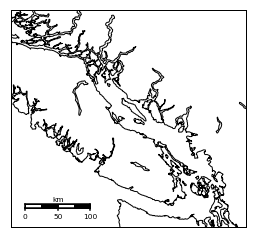

In [3]:
fig,ax=plt.subplots(1,1)
bmap=set_basemap(ax)


# Monthly Drifters
Quick plot of all the dirfters organized by month

/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


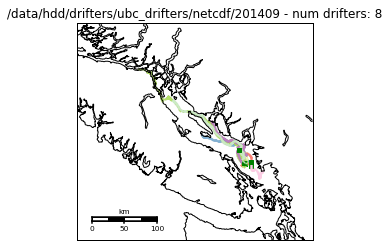

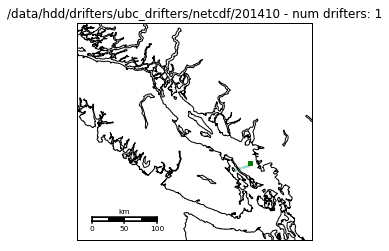

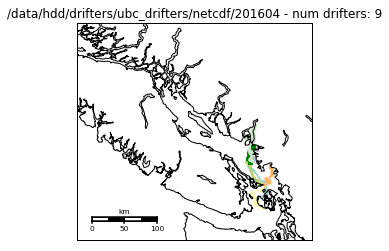

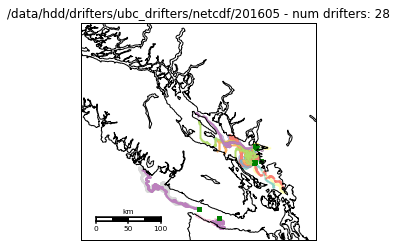

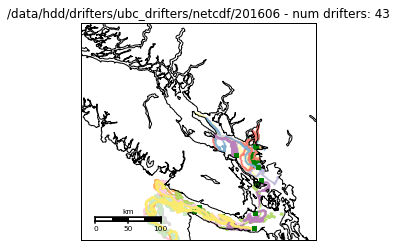

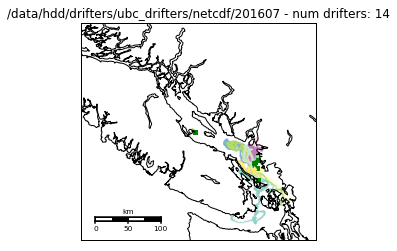

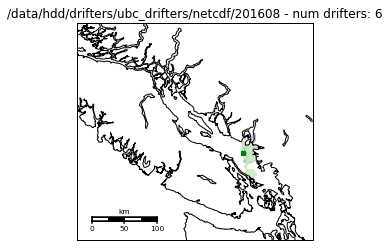

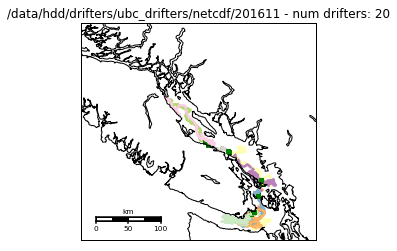

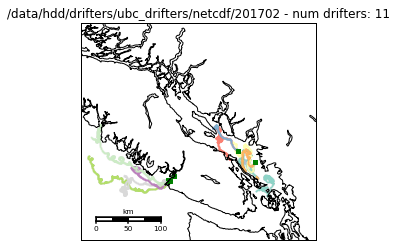

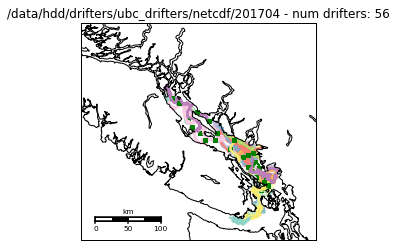

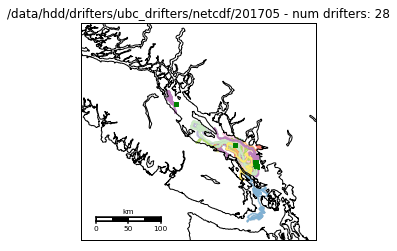

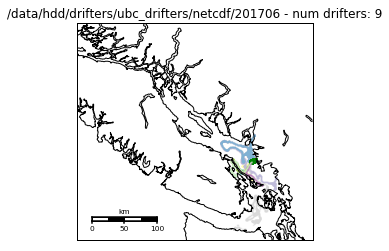

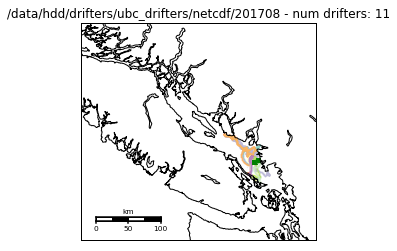

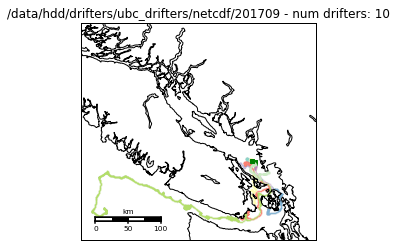

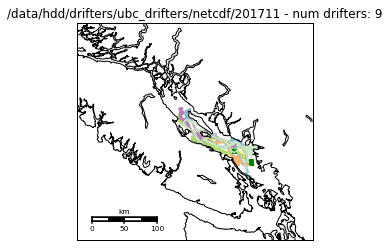

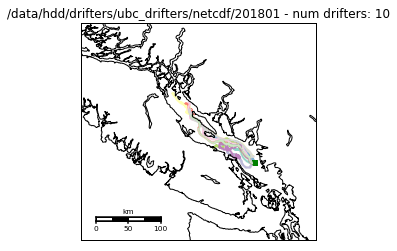

In [4]:
base='/data/hdd/drifters/ubc_drifters/netcdf'
dirs = glob.glob(os.path.join(base,'201*'))
dirs.sort()
for d in dirs:

    files = glob.glob(os.path.join(d,'*.nc'))
    if files:
        fig,ax=plt.subplots(1,1)
        bmap=set_basemap(ax)
        files.sort()
        cmap= matplotlib.cm.get_cmap('Set3')
        n=len(files)
        for i,f in enumerate(files):
            ncfile = nc.Dataset(f)
            lons = ncfile.variables['longitude'][:]
            lats = ncfile.variables['latitude'][:]
            x,y=bmap(lons, lats)
            ax.scatter(x, y ,marker='.', color=cmap(i/n), s=1, alpha=0.5)
            x,y=bmap(lons[0], lats[0])
            ax.scatter(x,y ,marker='s',color='g', s=15)
        ax.set_title('{} - num drifters: {}'.format(d,n))
        fig


# Time range for April 2017 drifters
Check which files to exclude because they extend into May

In [5]:
directory=os.path.join(base,'201704')
files=glob.glob(os.path.join(directory,'*.nc'))
excl=[]
for f in files:
    d=nc.Dataset(f)
    times=d.variables['time']
    times = nc.num2date(times[:],units=times.units)
    end=times[-1]
    if end.month !=4:
        print (f, end)
        excl.append(f)

/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_137_1493403034.nc 2017-05-16 04:14:19.999999
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_143_1493404534.nc 2017-05-06 06:44:04.999997
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_144_1493413415.nc 2017-05-03 01:05:59.000001
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_139_1493403241.nc 2017-05-13 02:29:27.999999
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_142_1493404150.nc 2017-05-09 09:35:06.000003
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_146_1493413654.nc 2017-05-11 07:34:06.000003
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_134_1493402932.nc 2017-05-14 00:46:06.999999
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_140_1493403507.nc 2017-05-11 16:00:56.000005
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_145_1493413535.nc 2017-05-05 00:55:43.000003
/data/hdd/drifters/ubc_drifters/netcdf/201704/UBC_138_1493403149.nc 2017-05-15 07:37:13.000005


Plot April drifters

/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'/data/hdd/drifters/ubc_drifters/netcdf/201704 - num drifters: 46')

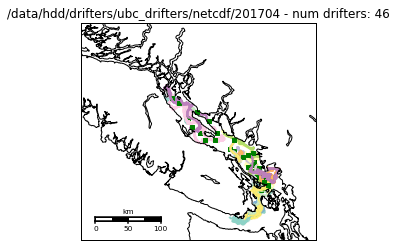

In [6]:
d=os.path.join(base,'201704')
files = glob.glob(os.path.join(d,'*.nc'))
fig,ax=plt.subplots(1,1)
bmap=set_basemap(ax)
files.sort()
cmap= matplotlib.cm.get_cmap('Set3')
n1=len(files)
n=0
for i,f in enumerate(files):
    if f not in excl:
        ncfile = nc.Dataset(f)
        lons = ncfile.variables['longitude'][:]
        lats = ncfile.variables['latitude'][:]
        x,y=bmap(lons, lats)
        ax.scatter(x, y ,marker='.', color=cmap(i/n1), s=1, alpha=0.5)
        x,y=bmap(lons[0], lats[0])
        ax.scatter(x,y ,marker='s',color='g', s=15)
        n+=1
ax.set_title('{} - num drifters: {}'.format(d,n))
